# Our angular area emitter

## Overview

This tutorial sets up a very simple scene with an area light and shows the resulting image/video for two different angles/points of view.

<div class="admonition important alert alert-block alert-success">

🚀 **You will learn how to:**

<ul>
  <li>
  
  Use the `angulararea` plugin</li>
</ul>

</div>

<div class="admonition important alert alert-block alert-warning">

The two tutorials `render_angular_1light.ipynb` and `render_area_1light.ipynb` show the same scene. The first one uses an `angulararea` emitter (our new plugin), and the second one uses the `area` emitter (Mitsuba 3's default).

You should use these tutorials to compare the effect of one light vs. the other and decide which one suits best your use case.

</div>

In [1]:
# If you have compiled Mitsuba 3 yourself, you will need to specify the path
# to the compilation folder
# import sys
# sys.path.insert(0, '<mitsuba-path>/mitsuba3/build/python')
import mitsuba as mi
# To set a variant, you need to have set it in the mitsuba.conf file
# https://mitsuba.readthedocs.io/en/latest/src/key_topics/variants.html
mi.set_variant('llvm_ad_rgb')

import mitransient as mitr

print('Using mitsuba version:', mi.__version__)
print('Using mitransient version:', mitr.__version__)

Using mitsuba version: 3.6.4
Using mitransient version: 1.2.0


In [2]:
# Load XML file
import os
# You can also use mi.load_dict and pass a Python dict object
# but it is probably much easier for your work to use XML files
scene = mi.load_file(os.path.abspath('scenes/angular_1light.xml'))


# Render the scene and develop the data
# Because mitsuba works with Dr.JIT, this cell will execute
# very fast. But when you actually read the variables
# it will actually start computing everyting (and take a while).
data_steady, data_transient = mi.render(scene, spp=256)

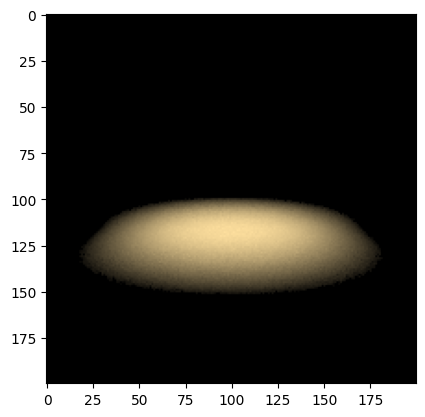

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow((data_steady / np.max(data_steady)) ** (1 / 4.0))
plt.show()

In [4]:
mitr.vis.show_video(
    (data_transient / np.max(data_transient)) ** (1 / 4.0),
    axis_video=2,
)

In [5]:
scene = mi.load_file(os.path.abspath('scenes/angular_1light.xml'))
params = mi.traverse(scene)

params['sensor.to_world'] = params['sensor.to_world'].look_at(
    mi.ScalarPoint3f(0, 50, 10),  # origin
    mi.ScalarPoint3f(0, 0, 30),      # target
    mi.ScalarPoint3f(0, 0, 1)    # up
)
params.update()

# Render the scene and develop the data
# Because mitsuba works with Dr.JIT, this cell will execute
# very fast. But when you actually read the variables
# it will actually start computing everyting (and take a while).
data_steady, data_transient = mi.render(scene, spp=64)

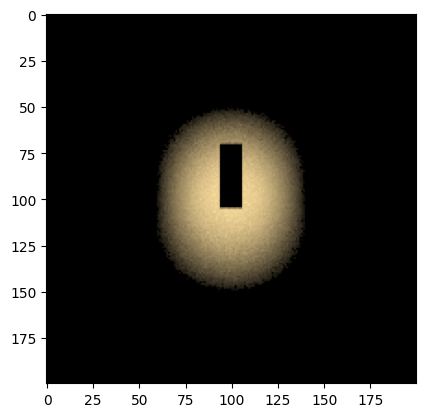

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow((data_steady / np.max(data_steady)) ** (1 / 4.0))
plt.show()

In [7]:
mitr.vis.show_video(
    (data_transient / np.max(data_transient)) ** (1 / 4.0),
    axis_video=2,
)